<a href="https://colab.research.google.com/github/C-Lion/HU-DS-BC/blob/main/Stage2_EmotionalToneAnalysis_HUDS2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Scope and Limitations

This analysis originally sought to determine whether the emotional tone of songs (as measured by valence and energy) changed significantly after the murder of George Floyd on May 25, 2020.

However, after inspecting the dataset, it became clear that:

- The majority of `release_date` values were missing or invalid.
- The valid dates in the dataset ranged from 1921 to 2017.
- No data was available for the year 2020 or later, making it impossible to compare song emotional tone before and after the target date.

As a result, the dataset could not support the intended research question. Nevertheless, this process demonstrated the importance of verifying data coverage early in the analysis workflow. The notebook includes all verification steps to transparently document the limitations encountered.


# Research Question
Did the emotional tone of songs (as measured by valence and energy) released in the months before and after George Floyd’s death on May 25, 2020, show a significant shift?



# Problem Statement
Music has long served as a mirror of collective emotion, especially during periods of social upheaval. The murder of George Floyd on May 25, 2020, and the subsequent protests marked a significant national trauma. This analysis explores whether the emotional tone of songs—measured using Spotify's valence and energy features—changed in the months following this event.

Hypothesis: Songs released after May 25, 2020, will have lower average valence and energy than those released before.


# Refined Research Question
Did the emotional tone of songs—as measured by valence and energy—change significantly after the murder of George Floyd on May 25, 2020? How might these changes reflect emotional and social responses in popular music?


#Setting up the environent for the data project in Python.


In [20]:
pip install pip

In [21]:
pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


# Set up Numerical Python and Data Structures:

In [22]:
pip install numpy


In [23]:
pip install pandas

# Set up Visualization Libraries

In [24]:
pip install matplotlib


In [25]:
pip install seaborn

##Geospatail Visualization tools

In [26]:
pip install folium

In [27]:
pip install geopandas

#Set up Scientific Python

In [28]:
pip install scipy

In [29]:
pip install statsmodels

In [30]:
pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 99.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [31]:
## I assume this version of scikit-learn will be suffient
##since this project will focus on data science rather than
#machine learning but it is something to keep in mind.

Load dataset

In [32]:
import pandas as pd


In [33]:
spotify_df = pd.read_csv("/content/data.csv")

In [34]:
spotify_df.head(7)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0
5,6NxAf7M8DNHOBTmEd3JSO5,Scherzo a capriccio: Presto,"['Felix Mendelssohn', 'Vladimir Horowitz']",352600,1928,1928,0.995,0.424,0.1200,0.911,0.0915,-19.242,0.0593,63.521,0.2660,0,6,0,0
6,6O0puPuyrxPjDTHDUgsWI7,"Valse oubliée No. 1 in F-Sharp Major, S. 215/1","['Franz Liszt', 'Vladimir Horowitz']",136627,1928,1928,0.956,0.444,0.1970,0.435,0.0744,-17.226,0.0400,80.495,0.3050,1,11,0,0


In [35]:
spotify_df.tail(7)

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
169902,5QZ11AHm7xiytOGXGlxQi5,Back Home (feat. Summer Walker),"['Trey Songz', 'Summer Walker']",194576,4/29/20,2020,0.0227,0.619,0.719,0.000000,0.0839,-4.111,0.1570,86.036,0.351,1,0,69,1
169903,52Cpyvd2dKb6XRn313nH87,Ojos De Maniaco,"['LEGADO 7', 'Junior H']",218501,2/28/20,2020,0.2100,0.795,0.585,0.000001,0.1120,-4.451,0.0374,97.479,0.934,1,8,68,0
169904,4KppkflX7I3vJQk7urOJaS,Skechers (feat. Tyga) - Remix,"['DripReport', 'Tyga']",163800,5/15/20,2020,0.1730,0.875,0.443,0.000032,0.0891,-7.461,0.1430,100.012,0.306,1,1,75,1
169905,1ehhGlTvjtHo2e4xJFB0SZ,Sweeter (feat. Terrace Martin),"['Leon Bridges', 'Terrace Martin']",167468,6/8/20,2020,0.0167,0.719,0.385,0.031300,0.1110,-10.907,0.0403,128.000,0.270,1,8,64,0
169906,52eycxprLhK3lPcRLbQiVk,How Would I Know,"['Kygo', 'Oh Wonder']",180700,5/29/20,2020,0.5380,0.514,0.539,0.002330,0.1080,-9.332,0.1050,123.700,0.153,1,7,70,0
169907,3wYOGJYD31sLRmBgCvWxa4,I Found You,"['Cash Cash', 'Andy Grammer']",167308,2/28/20,2020,0.0714,0.646,0.761,0.000000,0.2220,-2.557,0.0385,129.916,0.472,1,1,70,0
169908,60RFlt48hm0l4Fu0JoccOl,More Hearts Than Mine,['Ingrid Andress'],214787,3/27/20,2020,0.1090,0.512,0.428,0.000000,0.1050,-7.387,0.0271,80.588,0.366,1,0,65,0


In [36]:
spotify_df.describe()

,duration_ms,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
count,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,2.314062e+05,1977.223231,0.493214,0.538150,0.488593,0.161937,0.206690,-11.370289,0.094058,116.948017,0.532095,0.708556,5.200519,31.556610,0.084863
std,1.213219e+05,25.593168,0.376627,0.175346,0.267390,0.309329,0.176796,5.666765,0.149937,30.726937,0.262408,0.454429,3.515257,21.582614,0.278679
min,5.108000e+03,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.710400e+05,1957.000000,0.094500,0.417000,0.263000,0.000000,0.098400,-14.470000,0.034900,93.516000,0.322000,0.000000,2.000000,12.000000,0.000000
50%,2.086000e+05,1978.000000,0.492000,0.548000,0.481000,0.000204,0.135000,-10.474000,0.045000,114.778000,0.544000,1.000000,5.000000,33.000000,0.000000
75%,2.629600e+05,1999.000000,0.888000,0.667000,0.710000,0.086800,0.263000,-7.118000,0.075400,135.712000,0.749000,1.000000,8.000000,48.000000,0.000000
max,5.403500e+06,2020.000000,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,0.969000,244.091000,1.000000,1.000000,11.000000,100.000000,1.000000


#Verify the data needed for my research question is present
Inspect the columns to confirm if release_date, valence, and energy are present.



## Verify Dataset Columns
To confirm this dataset supports the research question, we must ensure that it includes a release date and emotion-related metrics like valence and energy.


In [37]:
# Check the column names
spotify_df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit'],
      dtype='object')

## Define Periods for Comparison
To evaluate emotional tone before and after the murder of George Floyd (May 25, 2020), we will split the dataset into two time periods.


In [38]:
# Ensure release_date is in datetime format
spotify_df['release_date'] = pd.to_datetime(spotify_df['release_date'], errors='coerce')

# Filter for year 2020 only
spotify_2020 = spotify_df[spotify_df['release_date'].dt.year == 2020].copy()

# Create period labels based on the cutoff date
cutoff = pd.to_datetime("2020-05-25")
spotify_2020['period'] = spotify_2020['release_date'].apply(
    lambda x: 'Before' if x < cutoff else 'After'
)

# Show the distribution by period
spotify_2020['period'].value_counts()


,count
period,


## Data Types & Type Conversion

We examined the dataframe’s types and determined that `release_date` should be a datetime format for time‑based analysis.

```python
spotify_df['release_date'] = pd.to_datetime(spotify_df['release_date'], errors='coerce')


## Emotional Tone by Period
This boxplot visualizes whether valence—the positivity of songs—changed significantly after May 25, 2020.


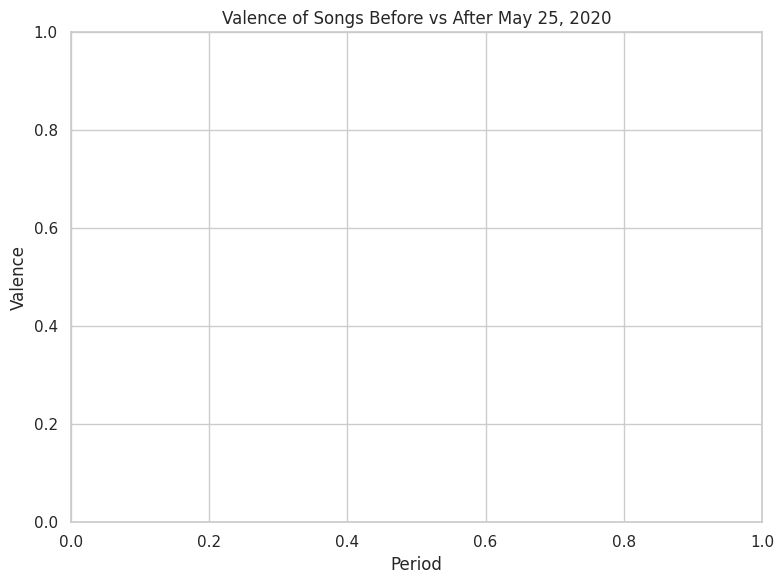

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Create boxplot for valence
plt.figure(figsize=(8, 6))
sns.boxplot(x='period', y='valence', data=spotify_2020, palette="coolwarm")
plt.title('Valence of Songs Before vs After May 25, 2020')
plt.xlabel('Period')
plt.ylabel('Valence')
plt.tight_layout()
plt.show()


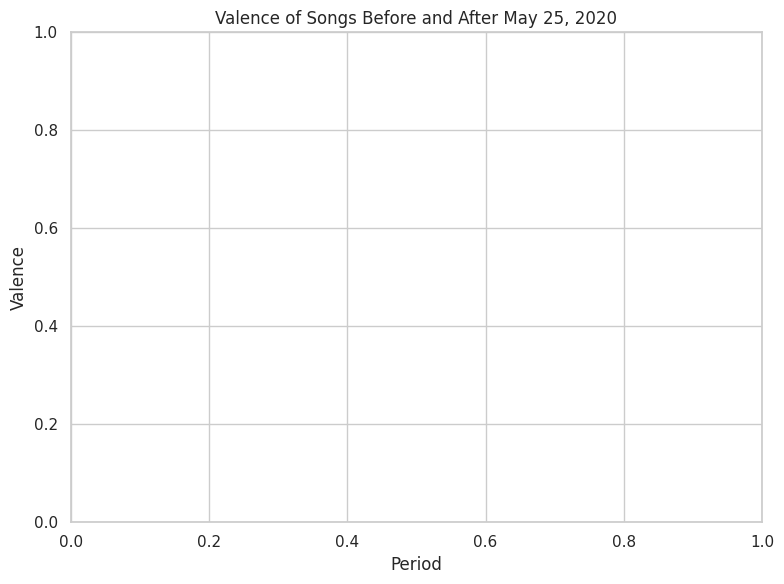

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing valence values
filtered_df = spotify_2020.dropna(subset=['valence'])

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='period', y='valence', data=filtered_df)
plt.title('Valence of Songs Before and After May 25, 2020')
plt.xlabel('Period')
plt.ylabel('Valence')
plt.tight_layout()
plt.show()


In [41]:
print(spotify_2020.shape)

(0, 20)


In [42]:
print("Dataset shape:", spotify_2020.shape)

Dataset shape: (0, 20)


#Checking to see what the data contains

In [43]:
print("Total rows:", spotify_df.shape[0])
print("Missing release_date values:", spotify_df['release_date'].isna().sum())
print("Earliest release_date:", spotify_df['release_date'].min())
print("Latest release_date:", spotify_df['release_date'].max())


Total rows: 169909
Missing release_date values: 119527
Earliest release_date: 1921-01-01 00:00:00
Latest release_date: 2017-01-01 00:00:00


When we filtered with:

python
<spotify_df['release_date'].dt.year == 2020>
there were zero matches, because the  dataset only includes songs up to 2017.

Since:

spotify_2020 was empty,

The boxplot had nothing to draw.



## Alternative Research Question


## Alternative Research Question

**Revised Research Question:**  
How did the emotional tone of popular songs—measured by valence and energy—change over time between 1921 and 2017?

## Updated Problem Statement

While the initial research objective was to investigate shifts in song mood surrounding the murder of George Floyd in 2020, the dataset does not include any music released after 2017. Therefore, that specific question is not feasible. However, the dataset spans nearly a century of music and includes rich information on emotional attributes like valence and energy.

This revised analysis investigates how the emotional tone of popular songs evolved between 1921 and 2017. By examining trends in average valence and energy over time, we aim to uncover whether certain periods reflect broader cultural or social changes in the emotional expression of popular music.

## Hypothesis

The emotional tone of songs, as reflected in valence and energy, has shifted over time, potentially exhibiting lower values during major historical disruptions and higher values during periods of cultural optimism.



Data cleaning & Preparation

In [44]:
# Ensure release_date is datetime
spotify_df['release_date'] = pd.to_datetime(spotify_df['release_date'], errors='coerce')

# Drop rows with missing valence, energy, or release_date
spotify_clean = spotify_df.dropna(subset=['valence', 'energy', 'release_date'])

# Extract year from release_date
spotify_clean['year'] = spotify_clean['release_date'].dt.year

# Filter for relevant range
spotify_clean = spotify_clean[(spotify_clean['year'] >= 1921) & (spotify_clean['year'] <= 2017)]

# Verify result
spotify_clean[['year', 'valence', 'energy']].describe()


/tmp/ipython-input-44-3451363797.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_clean['year'] = spotify_clean['release_date'].dt.year


,year,valence,energy
count,50382.000000,50382.000000,50382.000000
mean,1963.731988,0.502841,0.398221
std,21.570827,0.271409,0.264259
min,1921.000000,0.000000,0.000000
25%,1948.000000,0.272000,0.181000
50%,1962.000000,0.515000,0.339000
75%,1980.000000,0.726000,0.591000
max,2017.000000,1.000000,1.000000


#Box Plot: Valence over Time

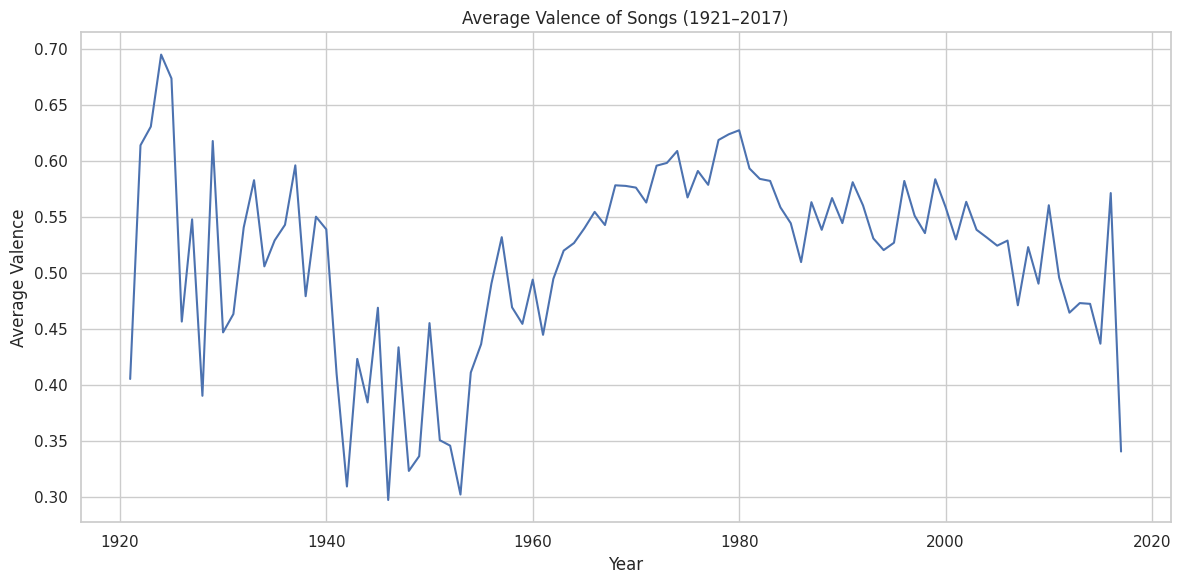

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate valence by year
yearly_valence = spotify_clean.groupby('year')['valence'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='valence', data=yearly_valence)
plt.title('Average Valence of Songs (1921–2017)')
plt.xlabel('Year')
plt.ylabel('Average Valence')
plt.grid(True)
plt.tight_layout()
plt.show()


## Interpretation of Visualization

The line plot of average valence (musical positivity) from 1921 to 2017 reveals distinct historical patterns. There is a noticeable dip in emotional tone during the 1930s and 1940s, which aligns with the Great Depression and World War II era. From the mid-1950s through the 1980s, valence trends upward, possibly reflecting post-war recovery, economic growth, and cultural optimism.

After 1990, valence appears to fluctuate with a slight overall decline, suggesting a gradual shift in popular musical mood. This may correspond to changing listener preferences, industry trends, or broader sociocultural developments.

Further statistical analysis would be required to validate these observations, but this exploratory visualization suggests that historical context may influence the emotional tone of popular music over time.


Plot Average Energy Over Time

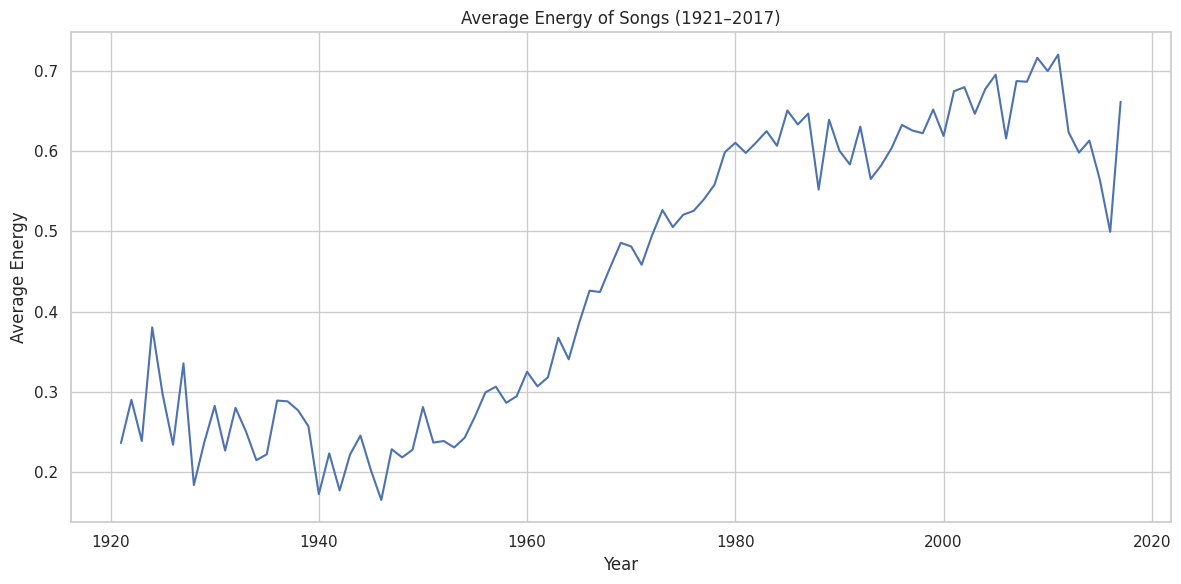

In [46]:
# Aggregate energy by year
yearly_energy = spotify_clean.groupby('year')['energy'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='energy', data=yearly_energy)
plt.title('Average Energy of Songs (1921–2017)')
plt.xlabel('Year')
plt.ylabel('Average Energy')
plt.grid(True)
plt.tight_layout()
plt.show()


## Preliminary Reflection on Trends

The rising trend in song energy from the 1950s onward aligns with the emergence and dominance of electrified musical styles like rock, disco, electronic, and hip-hop. These genres tend to feature higher tempos, amplified instrumentation, and more rhythmic intensity—elements strongly correlated with Spotify's "energy" metric.

The dip in energy during the 1930s–1940s may reflect both the recording technology of the era and the somber cultural mood during the Great Depression and World War II.

While these interpretations remain speculative at this stage, they suggest a strong case for deeper domain research in the next phase of this project.


A more detailed exploration of historical musical trends will be conducted in Stage 3, using peer-reviewed musicology or sociocultural studies to validate the patterns observed here.